# Microsoft Film Performance Insights 

## Background

Microsoft has observed that major companies are successfully creating original video content and capitalizing on the growing demand for streaming and theatrical releases. In response, Microsoft aims to establish a new movie studio to enter the competitive film industry. However, as a newcomer to movie production, Microsoft lacks the necessary insights into what types of films are currently thriving at the box office

# Objective

The primary objective of this project is to conduct an exploratory data analysis (EDA) to identify the types of films that are currently performing the best at the box office. This analysis will provide actionable insights to guide Microsoft's new movie studio in making informed decisions about the genres, themes, and characteristics of films they should focus on producing.

# Scope of Analysis

- Box Office Performance: Analyze the financial success of films over recent years, considering both domestic and international box office revenues.
- Genre Analysis: Examine which genres are most popular and profitable.
- Budget vs. Revenue: Investigate the relationship between production budgets and box office returns.
- Release Timing: Determine the impact of release dates and seasonal trends on box office performance.
- Audience and Critic Ratings: Assess how audience demographics, critic reviews, and ratings correlate with box office success.
- Marketing Impact: Evaluate the role of marketing efforts in driving box office revenue.

# Expected Outcomes 

- Genre Recommendations: Identify top-performing genres that Microsoft should consider focusing on.
- Optimal Budget Ranges: Provide insights into budget ranges that maximize profitability.
- Release Strategies: Recommend optimal release times to enhance box office performance.
- Marketing Strategies: Suggest effective marketing strategies based on successful campaigns from other studios.
- Audience Insights: Understand the target demographics for different types of films to tailor content accordingly.

By addressing these key areas, the project aims to equip Microsoft with the knowledge needed to make strategic decisions in the competitive movie industry, ultimately leading to the successful launch and operation of their new movie studio




## Data Description 

## Data Loading and Understanding

In [245]:
# Importing the relevant Libraries
import pandas as pd
import seaborn as sns
import sqlite3 as sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
# Load CSV datasets
df1 = pd.read_csv('zippedData/bom.movie_gross.csv')
df2 = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t')
df3 = pd.read_csv('zippedData/tn.movie_budgets.csv', index_col=0)

# Load SQL database
conn = sqlite3.connect('zippedData/im.zip')


In [247]:
#Exploring the CSV data sets
display(df1.head(2)) #Checking the 2 rows of dataframe1
display(df1.info()) # Obtaining a concise summary of dataframe1
display(df1.describe()) #descriptive statistics for the numerical columns


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [248]:
display(df2.head(2)) #Checking the 2 rows of dataframe2
display(df2.info()) # Obtaining a concise summary of dataframe2
display(df2.describe()) #descriptive statistics for the numerical columns


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


None

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [249]:
display(df3.head(2)) #Checking the 2 rows of dataframe3
display(df3.info()) # Obtaining a concise summary of dataframe3
display(df3.describe()) #descriptive statistics for the numerical columns

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


None

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


##### df1 and df2 have some missing values which need to be cleaned, while df3 has no missing values 

## Data Cleaning - Dealing with Missing Values 
#### Handling Missing Values in df1


In [250]:
display(df1.isna().sum()) #checking number of missing values in df1
df1_missing_value_percentage = df1.isnull().mean() * 100
print(df1_missing_value_percentage)


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


Although the foreign_gross column has approximately 40% missing values, it will be retained because it is an important part of this analysis. 

In [251]:
# changing the foreign_gross column data type
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')

# checking the summary stats for the column
display(df1['foreign_gross'].describe())

# Checking the median of the column
foreign_gross_median = df1['foreign_gross'].median()
print(f'The median is: {foreign_gross_median}')


count    2.032000e+03
mean     7.505704e+07
std      1.375294e+08
min      6.000000e+02
25%      3.775000e+06
50%      1.890000e+07
75%      7.505000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

The median is: 18900000.0


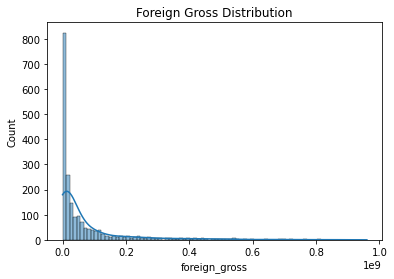

In [252]:
#Checking the distribution of foreign gross
sns.histplot(df1['foreign_gross'].dropna(), kde=True)
plt.title ("Foreign Gross Distribution")
plt.show()

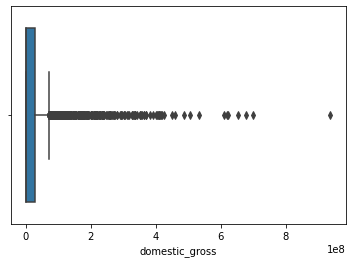

In [253]:
#Visualizing outliers
sns.boxplot(x=df1['domestic_gross'])
plt.show()

In [254]:
#Skewed distribution with presence of outliers, hence impute missing values in the column with the median
df1['foreign_gross'].fillna(df1['foreign_gross'].median(), inplace=True)

#confirm that the column no longer has missing values 
df1.isna().sum()


title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [255]:
#drop the rows with missing values in the domestic gross and studio columns since they are a small percentage

df1.dropna(subset=['domestic_gross'], inplace=True)
df1.dropna(subset=['studio'], inplace=True)

# confirm that the null values have been dropped 
df1.isna().sum()


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### Handling Missing Values in df2

In [256]:
display(df2.isna().sum()) #checking number of missing values in df2


df2_missing_value_percentage = df2.isnull().mean() * 100
print(df2_missing_value_percentage)

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64


In [257]:
# List of columns to drop, since more than 50% of their data is missing
columns_to_drop = ['currency', 'box_office', 'studio'] 
df2.drop(columns=columns_to_drop, inplace=True)

# Display the remaining columns
print(df2.columns)


Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime'],
      dtype='object')


In [258]:

# Defining a function to remove 'minutes' and convert the runtime column into float
def remove_minutes(runtime_col):
    if isinstance(runtime_col, str):
        return float(runtime_col.replace(' minutes', ''))
    return runtime_col

# Apply the function to the 'runtime' column
df2['runtime'] = df2['runtime'].apply(remove_minutes)

print(f'The mean is: {df2["runtime"].mean()}')

print(f'The median is: {df2["runtime"].median()}')

The mean is: 103.96797385620916
The median is: 100.0


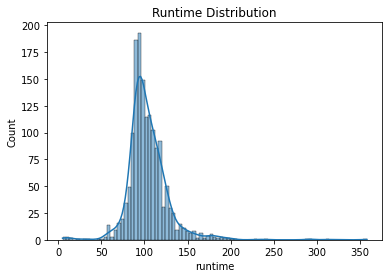

In [259]:
# Checking the distribution of runtime 
sns.histplot(df2['runtime'].dropna(), kde=True)
plt.title ("Runtime Distribution")
plt.show()

In [260]:
#Since the column exhibits a symmetrical distribution, impute the missing values with the mean
df2['runtime'].fillna(df2['runtime'].mean(), inplace=True)

#confirm that the column no longer has missing values 
df2.isna().sum()

id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime           0
dtype: int64

In [262]:
#Dropping missing values in the synopsis, rating, and genre columns as they account for a small percentage
df2.dropna(subset= ['synopsis', 'rating' , 'genre'], inplace= True)
df2.isna().sum()

id                0
synopsis          0
rating            0
genre             0
director        174
writer          398
theater_date    297
dvd_date        297
runtime           0
dtype: int64

In [266]:
#writting a custom function to impute the missing values in the remaining columns with the string 'unknown'
def custom_impute (col_name):
    return col_name.fillna('Unknown')

#columns to impute
cols_to_impute = ['director' , 'writer' , 'theater_date', 'dvd_date']
for col_name in cols_to_impute:
    df2[col_name] = custom_impute(df2[col_name])

df2.isna().sum()
    

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64